## Теоретическая часть

### Задание 1

Вспомним прошлый вебинар, мы рассматривали User-User рекомендации и Item-Item рекомендации. Чем они отличаются и чем они похожи? Если есть функция item_item_rec(interaction_matrix). Можно ли использовать эту функцию для user_user_rec?  
В чем принципиальные отличия item-item рекомендаций от ALS?


#### Ответ

User-User рекомендации и Item-Item рекомендации работают похожим образом, но зеркально. User-User рекомендации для каждого отдельного товара ищут наиболее похожих пользователей. Item-Item рекомендации для каждого отдельного пользователя ищут наиболее похожие товары. Математически это одинаковые алгоритмы. Вопрос, интерпретации: что мы называем user, а что называем item.

Отсюда следует, что если есть функция item_item_rec(interaction_matrix), то можно просто транспонировать исходную матрицу interaction_matrix, поменяв местами user и item, и вместо Item-Item рекомендации мы получим User-User рекомендации.

В ALS матрица interaction_matrix подготавливается другим способом. Все взаимодействия user-item, о которых мы ничего не знаем, мы присваем 0. И дальше каждому взаимодействию мы назначаем определенный вес. Таким образом различные взаимодействия в нашей матрице имеют не одинаковый вес, а сильно разный.  И оптимизируется не не просто ошибка между предсказанными и фактическими значениями, а умноженная та взвешенную матрицу (матрицу весов). Плюс L2-регуляризация. 



### Задание 2 

Приведите 3 примера весов (те, которых не было на вебинаре: сумма покупок, количество покупок - неинтересно) user-item матрицы для задачи рекомендаций товаров 


#### Ответ

Глубина просмотра видео, выставленный рейтинг фильму, как давно была последняя покупка, количество чеков (сколько раз приходил и покупал)
Также можем построить линейную комбинацию нескольких видов взаимодействий: количество, сумма покупок, глубина просмотра и т.д.
Можем дополнить нашу линейную комбинацию какой-то информации о товаре, например, вес его популярности

### Задание 3

Какие ограничения есть у ALS? (Тип информации, линейность/нелинейность факторов и т д)


#### Ответ

Не смог найти эту информацию. На уроке вы говорили только о восстановлении линейной зависимости факторов. Больше добавить не могу (. В статьях приложенных и в процессе поиска в гугле найти об этом ничего не получилось ((


#### Задание 4

Мы рассматривали bm_25_weight. 
Опишите, как он работает. Как сделать рекомендации только на основе bm_25? (Можно и нужно пользоваться любыми источниками, приложите на них ссылки). Какие еще способы перевзвешивания user-item матрицы Вы знаете / можете предложить (ещё 2-3 способа)?

#### Ответ

В классическую формулу TF-IDF добавляются дополнительные коэффициенты, за счет которых, появлюятся отличия в оценке релевантности документов (статьи, по которым я изучал алгоритм, относятся к задаче поиска документов).

1. В классическом TF-IDF вес документа будет расти пропорционально частоте вхождения ключевого слова до бесконечности. Можно "заспамить" документ ключевыми словами и получить высокую релевантность. В BM25 рост будет осуществляться ассимпотически и будет ограничен значениями добавленных коээфициентов

2. IDF для слов, которые встречаются больше чем в половине документов, могут принимать отрицательные значения

3. Короткие документы гораздо быстрее достигают насыщения по оценке TF

4. Значение Score зависит от длины документа D. Чем больше слов в документе, тем меньше будет итоговая оценка для документа.

Мне понравились 2 статьи, где описывался этот алгоритм:

http://webline.blog/algoritm-okapi-bm25-modifikacziya-formuly-tf-idf-ranzhirovaniya-dokumentov/

https://habr.com/ru/post/162937/


Правда я так и не разобрался, где брать значения коэффициентов. В первой статье шла речь, что необходимо наличие ассесоров, которые размечают эталонные данные и на основе этой информации рассчитываются коэффициенты методом подгонки массива текстов под оценки ассессоров.

Если я правильно понял идею, то при перевзвешивании user-item матрицы мы можем использовать сколько угодно много различных показателей явных и неявных интеракций (количество, продаж, сумма продаж, глубина просмотра, рейтинг,  популярность товара, добавление в нравится и т.д.). Разница лишь в том, что мы можем взять либо один показатель, либо составить линейную комбинацию из этих показателей, как-то подобрав веса перед ними. Либо использовать алгоритмы TF-IDF, BM25 для вычисления весов (релевантности) каждой интеракции на основе вхождения различных исходных показателей в каждую интеракцию.

Но скорее, всего моя гипотеза, описанная в предыдущем абзаце ошибочная, так как я не нашел примеров, где бы в методы tfidf_weight, bm25_weight передавались несколько разных показателй интеракций. А передается только какая-то одна, как у нас на уроке было.

В сети других идей, как можно еще перевзвесить матрицу я не нашел. Во всех статьях, которые мне попадались обычно шла речь о линейной комбинации вида $c_{i,j} = 1+\lambda \cdot r_{i,j}$. То что наверное, можно сделать линейную комбинацию нескольких разных показателей интеракции, я "додумал" уже сам. И не уверен в правильности этой идеи.

Но я посмотрел подробнее еще другие методы в библиотеке implicit.nearest_neighbours, и нашел среди них еще 2 примера: log, log1p. Предполагаю, что их можно также использовать для взвешивания матрицы. Первая функция возвращает логарифм переданного значения, вторая логарирфм от единица плюс значение. Других функций в этой же библиотеке не нашел.

P.S. Документация у библиотеки implicit ужасная! Точнее ее почти нет совсем. Описаны лишь некоторые методы. И то не очень много.

## Практическая часть


### Импортируем библиотеки, загрузим и подготовим данные, повторим бейзлайн с урока

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Для работы с матрицами
from scipy.sparse import csr_matrix

# Матричная факторизация
from implicit.als import AlternatingLeastSquares
from implicit.nearest_neighbours import bm25_weight, tfidf_weight

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
def precision_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(bought_list, recommended_list)
    #print(flags)
    
    
    precision = flags.sum() / len(recommended_list)
    
    
    return precision

In [4]:
# Загрузим данные

data = pd.read_csv('../Lesson2/data/retail_train.csv')

data.columns = [col.lower() for col in data.columns]
data.rename(columns={'household_key': 'user_id',
                    'product_id': 'item_id'},
           inplace=True)


test_size_weeks = 3

data_train = data[data['week_no'] < data['week_no'].max() - test_size_weeks]
data_test = data[data['week_no'] >= data['week_no'].max() - test_size_weeks]

data_train.head(2)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0


In [5]:
result_train = data_train.groupby('user_id')['item_id'].unique().reset_index()
result_train.columns=['user_id', 'actual']
result_train.head(2)

result_test = data_test.groupby('user_id')['item_id'].unique().reset_index()
result_test.columns=['user_id', 'actual']
result_test.head(2)

,user_id,actual
0,1,"[821867, 834484, 856942, 865456, 889248, 90795..."
1,3,"[835476, 851057, 872021, 878302, 879948, 90963..."


In [6]:
# Построим топ-5000
popularity = data_train.groupby('item_id')['quantity'].sum().reset_index()
popularity.rename(columns={'quantity': 'n_sold'}, inplace=True)

top_5000 = popularity.sort_values('n_sold', ascending=False).head(5000).item_id.tolist()

In [7]:
# Заведем фиктивный item_id (если юзер покупал товары из топ-5000, то он "купил" такой товар)
data_train.loc[~data_train['item_id'].isin(top_5000), 'item_id'] = 999999

user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', # Можно пробоват ьдругие варианты
                                  aggfunc='count', 
                                  fill_value=0
                                 )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
# Сформируем user_item_matrix
user_item_matrix = user_item_matrix.astype(float) # необходимый тип матрицы для implicit

sparse_user_item = csr_matrix(user_item_matrix).tocsr()

user_item_matrix.head(3)

item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15778533,15831255,15926712,15926775,15926844,15926886,15927403,15927661,15927850,16809471
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
user_item_matrix.shape

(2499, 5001)

In [10]:
userids = user_item_matrix.index.values
itemids = user_item_matrix.columns.values

matrix_userids = np.arange(len(userids))
matrix_itemids = np.arange(len(itemids))

id_to_itemid = dict(zip(matrix_itemids, itemids))
id_to_userid = dict(zip(matrix_userids, userids))

itemid_to_id = dict(zip(itemids, matrix_itemids))
userid_to_id = dict(zip(userids, matrix_userids))

In [11]:
def fit_model(user_item_matrix):

    model = AlternatingLeastSquares(factors=100, #k
                                    regularization=0.001,
                                    iterations=15, 
                                    calculate_training_loss=True, 
                                    num_threads=4, 
                                    random_state=123)

    model.fit(csr_matrix(user_item_matrix).T.tocsr(),  # На вход item-user matrix
              show_progress=True)

    return model


def get_recommendations(user, model, N=5):
    res = [id_to_itemid[rec[0]] for rec in 
                    model.recommend(userid=userid_to_id[user], 
                                    user_items=sparse_user_item,   # на вход user-item matrix
                                    N=N, 
                                    filter_already_liked_items=False, 
                                    filter_items=None, 
                                    recalculate_user=True)]
    return res

In [12]:
precs_train = []
precs_test = []

In [13]:
%%time

model = fit_model(user_item_matrix)


Wall time: 4.06 s


In [14]:
%%time

# Обычная матрица 
result_train['als'] = result_train['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
prec = result_train.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()
precs_train.append(prec)
prec

Wall time: 49.8 s


0.7395758303321189

In [15]:
result_test['als'] = result_test['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
prec = result_test.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()
precs_test.append(prec)
prec

0.15788442703231947

In [16]:
precs_train, precs_test

([0.7395758303321189], [0.15788442703231947])

### Подбор матрицы $c_{ui}$
Попробуйте различные варианты матрицы весов (3+ вариантов). Обучите алгоритм для различных $C$. В качестве результата приведите таблицу: матрица весов - результат на train и validation.
Сделате качественные выводы.


### Решение

Количество покупок

In [17]:
user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', # Можно пробоват ьдругие варианты
                                  aggfunc='sum', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) 
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

user_item_matrix.head(3)

item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15778533,15831255,15926712,15926775,15926844,15926886,15927403,15927661,15927850,16809471
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
%%time

model = fit_model(user_item_matrix)


Wall time: 3.83 s


In [19]:
%%time

result_train['als'] = result_train['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
prec = result_train.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()
precs_train.append(prec)
prec

Wall time: 52.7 s


0.7164465786314388

In [20]:
result_test['als'] = result_test['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
prec = result_test.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()
precs_test.append(prec)
prec

0.14191968658178095

Сумма покупок

In [21]:
user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='sales_value', # Можно пробоват ьдругие варианты
                                  aggfunc='sum', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) 
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

user_item_matrix.head(3)

item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15778533,15831255,15926712,15926775,15926844,15926886,15927403,15927661,15927850,16809471
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
%%time

model = fit_model(user_item_matrix)


Wall time: 4.5 s


In [23]:
%%time

result_train['als'] = result_train['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
prec = result_train.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()
precs_train.append(prec)
prec

Wall time: 42.4 s


0.5957583033213217

In [24]:
result_test['als'] = result_test['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
prec = result_test.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()
precs_test.append(prec)
prec

0.09990205680705123

Взвешенное по времени количество покупок. Чем больше номер периода, тем больше вес покупки

In [25]:
data_train['week_no_log'] = data_train['week_no'].apply(lambda x: np.log(1+x))

<ipython-input-25-110b5a532f8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['week_no_log'] = data_train['week_no'].apply(lambda x: np.log(1+x))


In [26]:
data_train.head(3)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,week_no_log
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0,0.693147
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0,0.693147
2,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,0.0,0.0,0.693147


In [27]:
user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='week_no_log', # Можно пробоват ьдругие варианты
                                  aggfunc='sum', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) 
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

user_item_matrix.head(3)

item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15778533,15831255,15926712,15926775,15926844,15926886,15927403,15927661,15927850,16809471
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.418841,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [28]:
%%time

model = fit_model(user_item_matrix)


Wall time: 4.11 s


In [29]:
%%time

result_train['als'] = result_train['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
prec = result_train.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()
precs_train.append(prec)
prec

Wall time: 41.7 s


0.5314925970388148

In [30]:
result_test['als'] = result_test['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
prec = result_test.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()
precs_test.append(prec)
prec

0.08716944172379995

In [31]:
precs_train, precs_test

([0.7395758303321189,
  0.7164465786314388,
  0.5957583033213217,
  0.5314925970388148],
 [0.15788442703231947,
  0.14191968658178095,
  0.09990205680705123,
  0.08716944172379995])

In [47]:
matrixes = ['Количество покупок (транзакций)', 
            'Количество покупок (штук)',
            'Сумма покупок',
            'Взвешенное по времени количество покупок'
           ]

scores = pd.DataFrame(list(zip(matrixes, precs_train, precs_test)), columns=['matrixes','train', 'test'])
scores.set_index('matrixes')

,train,test
matrixes,,
Количество покупок (транзакций),0.739576,0.157884
Количество покупок (штук),0.716447,0.141920
Сумма покупок,0.595758,0.099902
Взвешенное по времени количество покупок,0.531493,0.087169


__Выводы:__

Лучшие результаты показал базовый вес - количество покупок (транзакций). Ни количество купленных единиц, ни сумма покупки, ни зависимость покупок от времени, не дали такого же результата, как просто количество покупок.

Для меня это оказалось удивительно. Ведь не может быть так все банально просто "посчитай сколько раз user покупал". Ведь должна информация о том, как много он покупал, как давно он покупал, как-то влиять положительно на качество рекомендации. Я уверен, такая и более сложная информация активно используется в практике, возможно просто применяется как-то иначе, не так грубо, как попробовал я.

### Оптимизация гипперпараметров
Для лучшей матрицы весов из первого задания подберите оптимальные $\lambda$ и n_factors. Подбор можно делать вручную (цикл в цикле, аналог sklearn.GridSearch, или случайно - sklearn.RandomSearch). Или Вы можете воспользоваться библиотеками для автоматического подбора гипперпараметров (любые на Ваш вкус). В качестве результата постройте графики:
1. Значение параметра - время обучения 
2. Значение параметра - качество train, качество validation  

Сделайте качественные выводы

### Решение

Сформируем снова базовую матрицу на основе количества покупок

In [17]:
user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', 
                                  aggfunc='sum', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) 
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

user_item_matrix.head(3)

item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15778533,15831255,15926712,15926775,15926844,15926886,15927403,15927661,15927850,16809471
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def ALS(user_item_matrix, factors=100, regularization=0.001, show_progress=False):

    model = AlternatingLeastSquares(factors=factors, #k
                                    regularization=regularization,
                                    iterations=15, 
                                    calculate_training_loss=True, 
                                    num_threads=4, 
                                    random_state=123)

    model.fit(csr_matrix(user_item_matrix).T.tocsr(),  # На вход item-user matrix
              show_progress=show_progress)
    
    return model


def eval_precision_at_k(model, result, k=5):
    result['als'] = result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
    prec = result.apply(lambda row: precision_at_k(row['als'], row['actual'], k=k), axis=1).mean()
    return prec

In [82]:
factors = [10, 20, 50, 100, 200, 300]
lambdas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]

In [21]:
import time

Переберем разные значения для factors

In [84]:
%%time

precisions_train = []
precisions_test = []
learn_durations = []

for factor in factors:
    
    start_time = time.time()
    model = ALS(user_item_matrix, factors=factor, show_progress=True)
    learn_durations.append(time.time() - start_time)
    
    precisions_train.append(eval_precision_at_k(model, result_train))
    precisions_test.append(eval_precision_at_k(model, result_test))
    
precisions_train, precisions_test, learn_durations


Wall time: 13min 17s


([0.5167667066826712,
  0.563345338135249,
  0.6351340536214388,
  0.7164465786314388,
  0.8235294117646895,
  0.8654661864745792],
 [0.14720861900097762,
  0.14887365328109498,
  0.14779627815866608,
  0.14191968658178095,
  0.13143976493633588,
  0.11949069539666896],
 [3.3680574893951416,
  3.0702438354492188,
  3.464042901992798,
  3.953033924102783,
  7.504715919494629,
  11.87423038482666])

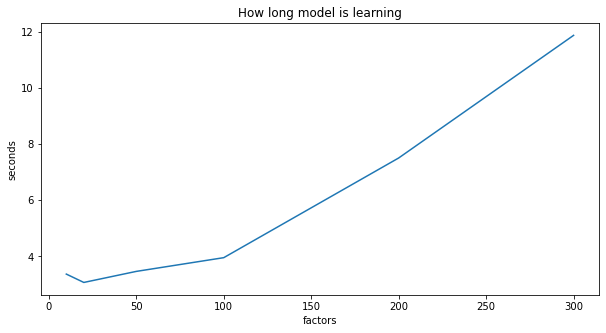

In [85]:
fig, ax = plt.subplots(figsize=(10, 5), )
ax.plot(factors, learn_durations)

plt.xlabel('factors')
plt.ylabel('seconds')
plt.title('How long model is learning')
plt.show();

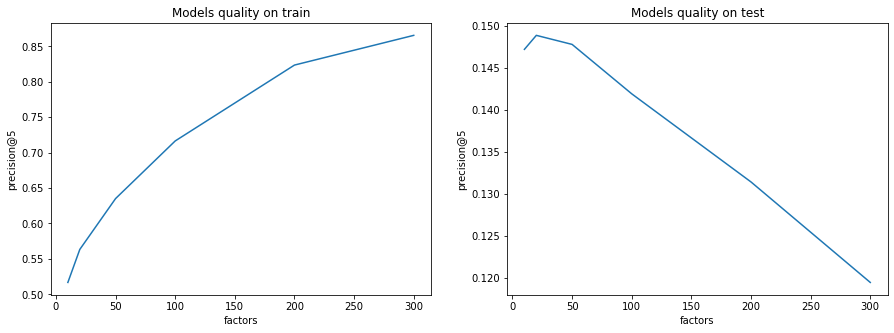

In [87]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(factors, precisions_train, label='precision@5 on train')
ax1.set_title('Model''s quality on train')
ax1.set_xlabel("factors")
ax1.set_ylabel("precision@5")

ax2.plot(factors, precisions_test, label='precision@5 on test')
ax2.set_xlabel("factors")
ax2.set_ylabel("precision@5")
ax2.set_title('Model''s quality on test')              

plt.show();

Переберем разные значения для lambda

In [88]:
%%time

precisions_train2 = []
precisions_test2 = []
learn_durations2 = []

for lambda_ in lambdas:
    
    start_time = time.time()
    model = ALS(user_item_matrix, regularization=lambda_, show_progress=True)
    learn_durations2.append(time.time() - start_time)
    
    precisions_train2.append(eval_precision_at_k(model, result_train))
    precisions_test2.append(eval_precision_at_k(model, result_test))
    
precisions_train2, precisions_test2, learn_durations2


Wall time: 10min 15s


([0.7164465786314388,
  0.7152460984393624,
  0.7130052020808185,
  0.710284113645445,
  0.7094837935173939,
  0.7038015206082309,
  0.6929171668667359],
 [0.14191968658178095,
  0.14299706170420995,
  0.14387855044074277,
  0.14456415279137935,
  0.14554358472086015,
  0.14495592556317155,
  0.1447600391772754],
 [3.9725401401519775,
  3.9097466468811035,
  4.059681177139282,
  4.451456546783447,
  3.6948888301849365,
  4.3874921798706055,
  3.8627777099609375])

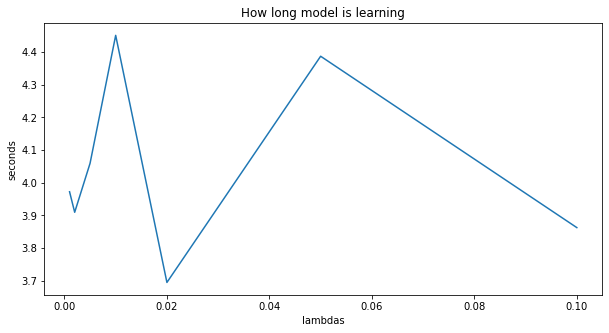

In [89]:
fig, ax = plt.subplots(figsize=(10, 5), )
ax.plot(lambdas, learn_durations2)

plt.xlabel('lambdas')
plt.ylabel('seconds')
plt.title('How long model is learning')
plt.show();

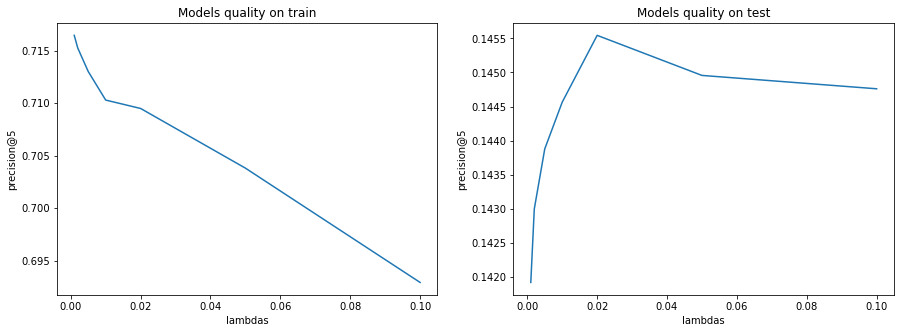

In [91]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(lambdas, precisions_train2, label='precision@5 on train')
ax1.set_title('Model''s quality on train')
ax1.set_xlabel("lambdas")
ax1.set_ylabel("precision@5")

ax2.plot(lambdas, precisions_test2, label='precision@5 on test')
ax2.set_xlabel("lambdas")
ax2.set_ylabel("precision@5")
ax2.set_title('Model''s quality on test')              

plt.show();

#### Выводы:

С ростом количества факторов растет время, затрачиваемое на обучение модели. Причем растет нелинейно. Характер похож на экспоненту. Что вполне ожидаемо, так как вычислительная сложность алгоритма при увеличении числа факторов тоже должна расти.

Но длинное время обучения почти "ничто" с длинным временем предсказания :) и расчетом метрики. Если расчет метрики мы делаем не numpy-стиле (используем самописную функцию на чистом питоне), то почему так долго строится рекомендации, не могу понять. Неужели в проде время предсказания для всего датасета тоже в несколько раз больше времени обучения? На предыдущих курсах всегда было наоборот.

Теперь перейдем к качеству моделей. С ростом числа факторов качество модели на train растет (приближается к некой ассимптоте), а на test сначала достигает некоего максимума, а потом начинает падать. Видно, как модель сильно переобучается. Отсюда можно сделать вывод, что оптимальное количество факторов надо подбирать, причем оптимальнео значение скорее будет в области не очень больших значений.

Перейдем к коэффициенту регуляризации $\lambda$.

Время обучения почти не зависит от разных значений этого параметра. Хоть график и получился ломанный, но все значения колеблются в диапазоне от 3.7 секунд до 4.4 секунд. Так будем считать это шумом. В целом время обучения от разных $\lambda$ не зависит.

А с качеством обучения метрика картинка другая. Чем больше параметр регуляризации, тем хуже значеня на train. А на тест, результат сначала резко растет, достигает некоторого максимума, а дальше постепенно снижается, причем плавно замедляясь.

Отсюда сделаем вывод, что параметр регуляризации тоже нужно подбирать, но главное не переусердствовать. Но даже, если установить этот параметр немного выше, это понизит общее качество предсказания, хотя не так сильно и при этом модель все равно будет устойчива.

**P.S.** Не пишите отписки в качестве выводов. Мне интресены Ваши рассуждения, трудности, с которыми Вы сталкнулись и что-то, что Вас удивило. Если выводы контринтуитивны - напишите об этом, в этом нет ничего страшного!